df: data ban đầu
---
df1: phiên bản data không có null
---
df2: phiên bản data không có null + ouliers (Bởi vì bộ dữ liệu lớn, nhóm chúng em chọn hệ số nhân là 2,5)
---
df3: phiên bảng data chỉ có biến giá trị, là df2 sau khi bỏ các cột ['device_brand', 'os', '4g', '5g']
---
df_model: phiên bản data dùng để tạo model (dựa trên df2)

In [47]:
#import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('used_device_data.csv')
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


# Xử lý dữ liệu


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

## Missing values

In [50]:
df.isnull().sum()
df.isnull().sum()*100/3454

device_brand             0.000000
os                       0.000000
screen_size              0.000000
4g                       0.000000
5g                       0.000000
rear_camera_mp           5.182397
front_camera_mp          0.057904
internal_memory          0.115808
ram                      0.115808
battery                  0.173712
weight                   0.202664
release_year             0.000000
days_used                0.000000
normalized_used_price    0.000000
normalized_new_price     0.000000
dtype: float64

In [51]:
df1 = df.copy()
df1.dropna(inplace=True)
df1.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3253 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3253 non-null   object 
 1   os                     3253 non-null   object 
 2   screen_size            3253 non-null   float64
 3   4g                     3253 non-null   object 
 4   5g                     3253 non-null   object 
 5   rear_camera_mp         3253 non-null   float64
 6   front_camera_mp        3253 non-null   float64
 7   internal_memory        3253 non-null   float64
 8   ram                    3253 non-null   float64
 9   battery                3253 non-null   float64
 10  weight                 3253 non-null   float64
 11  release_year           3253 non-null   int64  
 12  days_used              3253 non-null   int64  
 13  normalized_used_price  3253 non-null   float64
 14  normalized_new_price   3253 non-null   float64
dtypes: float6

## Xử lý ouliers

In [53]:
def find_outliers_IQR(feature):
    q1 = df1[feature].quantile(0.25)
    q3 = df1[feature].quantile(0.75)
    IQR = q3 - q1
    outliers = df1[((df1[feature] < (q1 - 2.5 * IQR)) | (df1[feature] > (q3 + 2.5 * IQR)))]
    return outliers
num_features = df1.select_dtypes(include=np.number).columns.tolist()
print(num_features )
for i in num_features:
    outliers = find_outliers_IQR(i)
    num_outliers = len(outliers)
    print(f"{i}: {num_outliers}")

['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']
screen_size: 224
rear_camera_mp: 5
front_camera_mp: 126
internal_memory: 121
ram: 498
battery: 18
weight: 318
release_year: 0
days_used: 0
normalized_used_price: 11
normalized_new_price: 3


In [54]:
df2 = df1.drop(outliers.index)
print("Data shape before removing outliers:", df1.shape)
print("Data shape after removing outliers:", df2.shape)

Data shape before removing outliers: (3253, 15)
Data shape after removing outliers: (3250, 15)


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3250 non-null   object 
 1   os                     3250 non-null   object 
 2   screen_size            3250 non-null   float64
 3   4g                     3250 non-null   object 
 4   5g                     3250 non-null   object 
 5   rear_camera_mp         3250 non-null   float64
 6   front_camera_mp        3250 non-null   float64
 7   internal_memory        3250 non-null   float64
 8   ram                    3250 non-null   float64
 9   battery                3250 non-null   float64
 10  weight                 3250 non-null   float64
 11  release_year           3250 non-null   int64  
 12  days_used              3250 non-null   int64  
 13  normalized_used_price  3250 non-null   float64
 14  normalized_new_price   3250 non-null   float64
dtypes: float6

## EDA

Số lượng các biến của từng cột

In [56]:
df2.nunique()

device_brand               33
os                          4
screen_size               134
4g                          2
5g                          2
rear_camera_mp             41
front_camera_mp            36
internal_memory            15
ram                        12
battery                   314
weight                    542
release_year                8
days_used                 877
normalized_used_price    2918
normalized_new_price     2843
dtype: int64

### Trực quan hóa biến phân loại

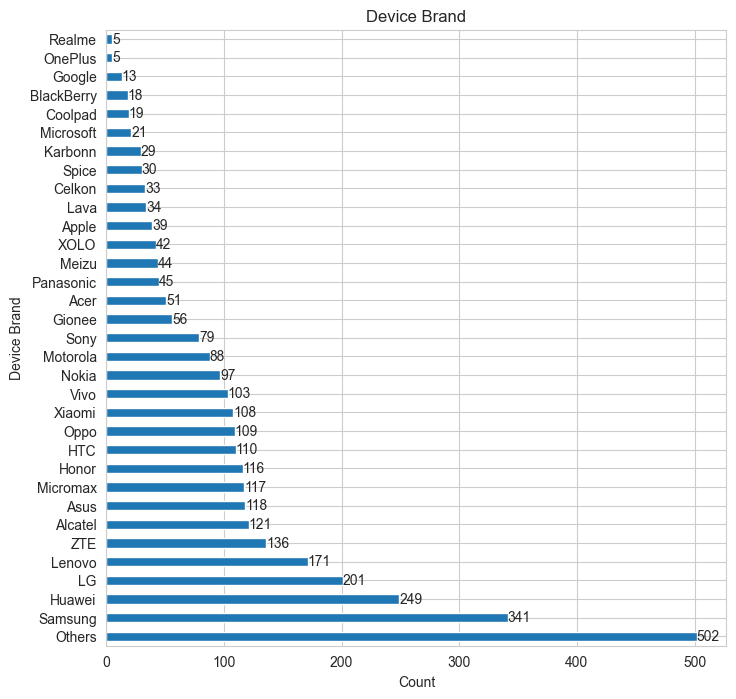

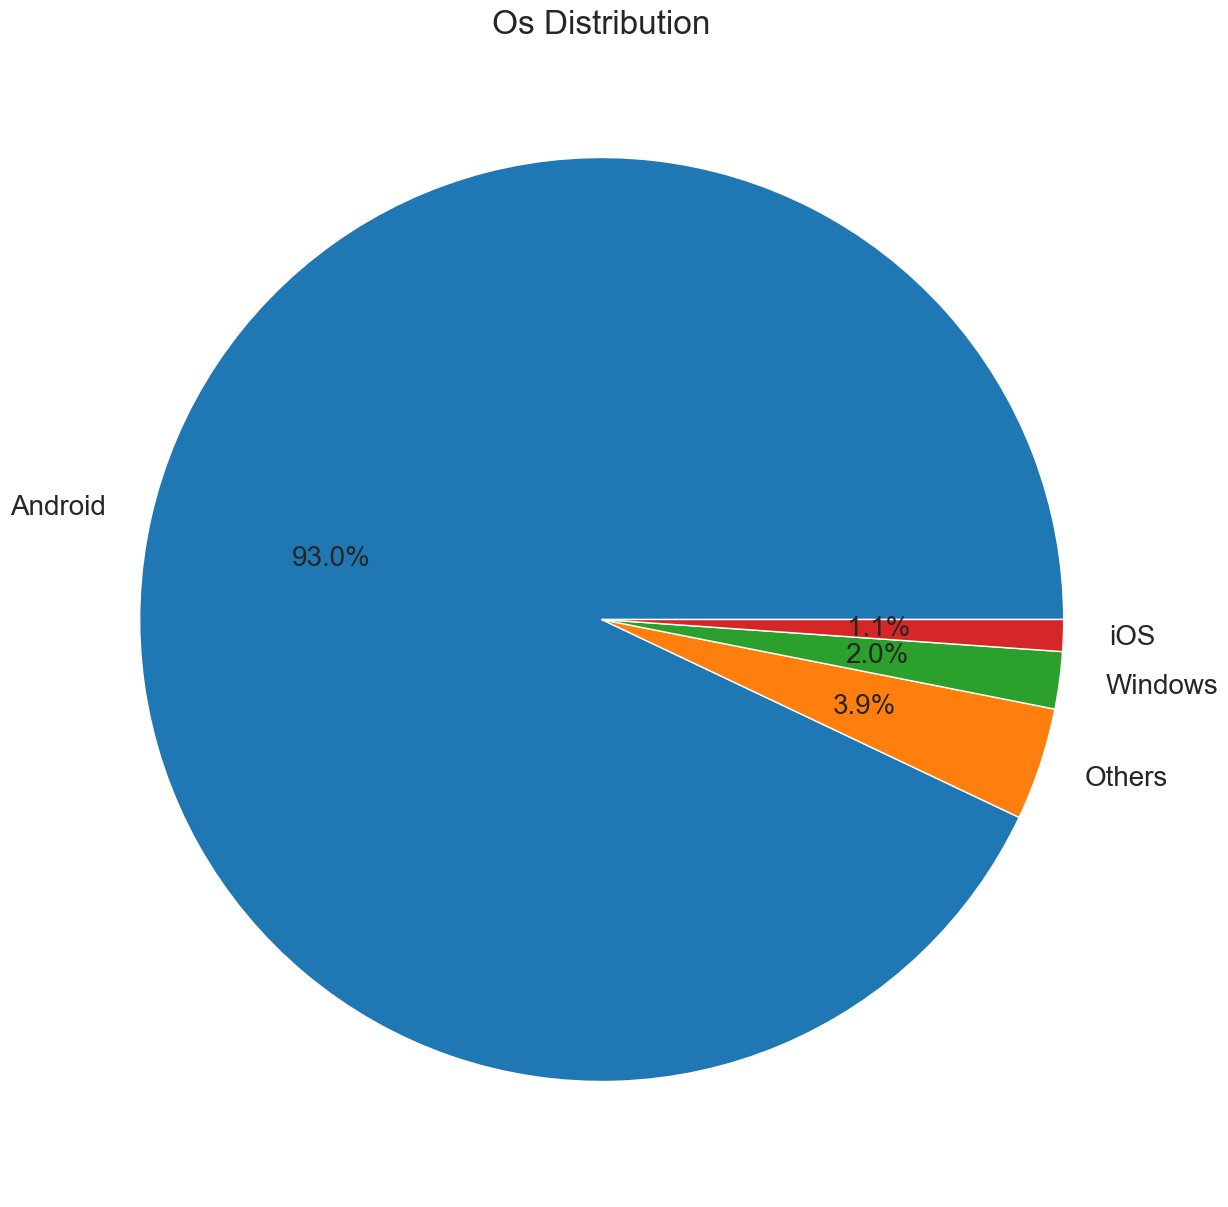

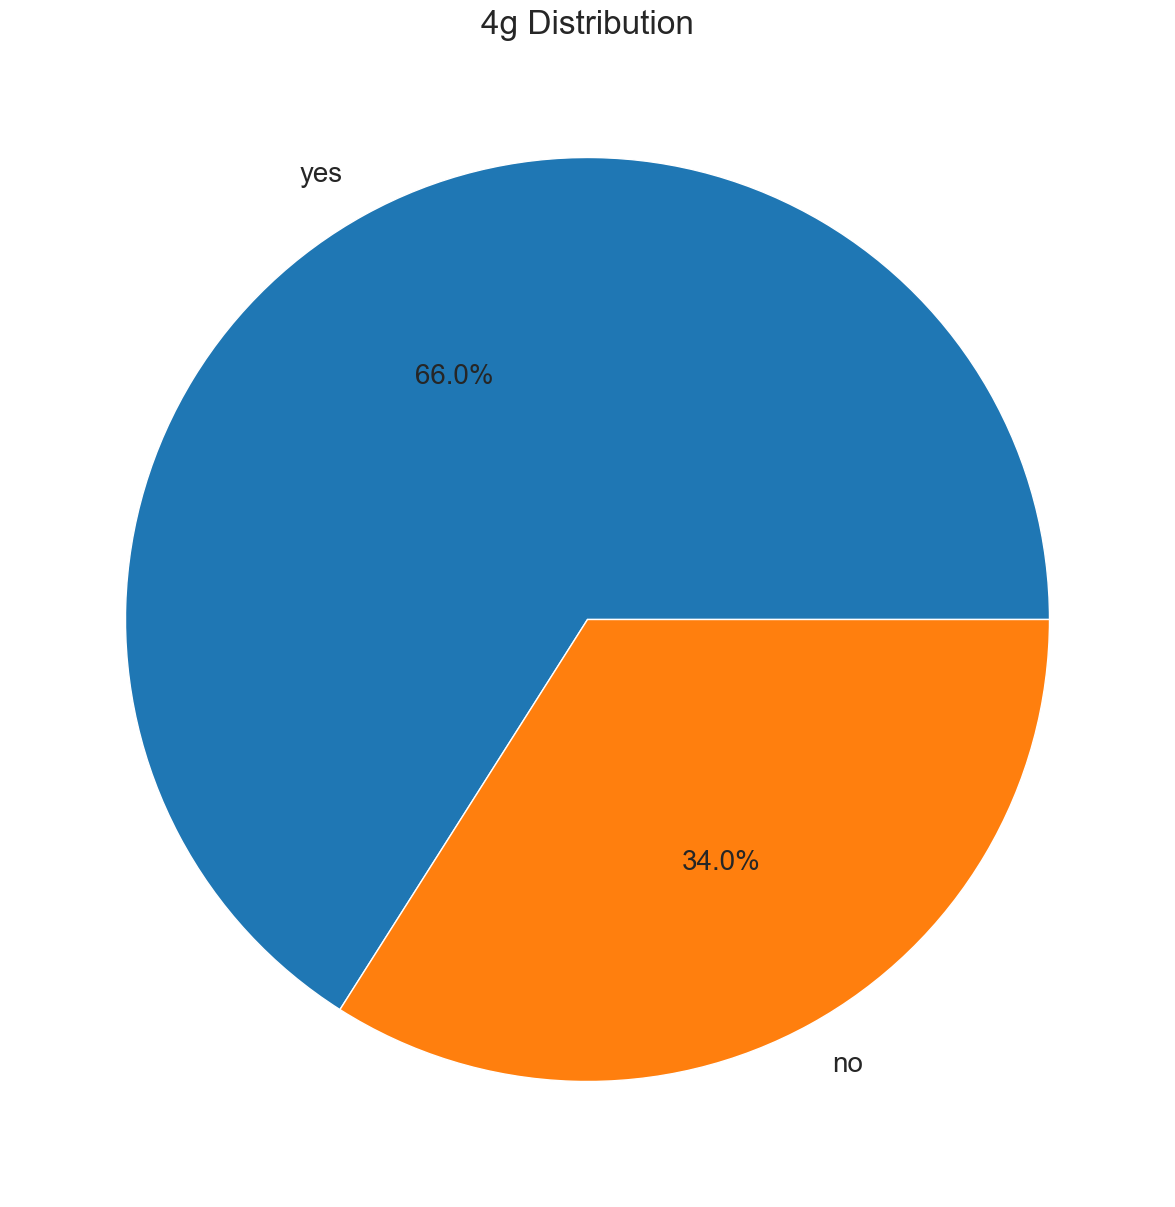

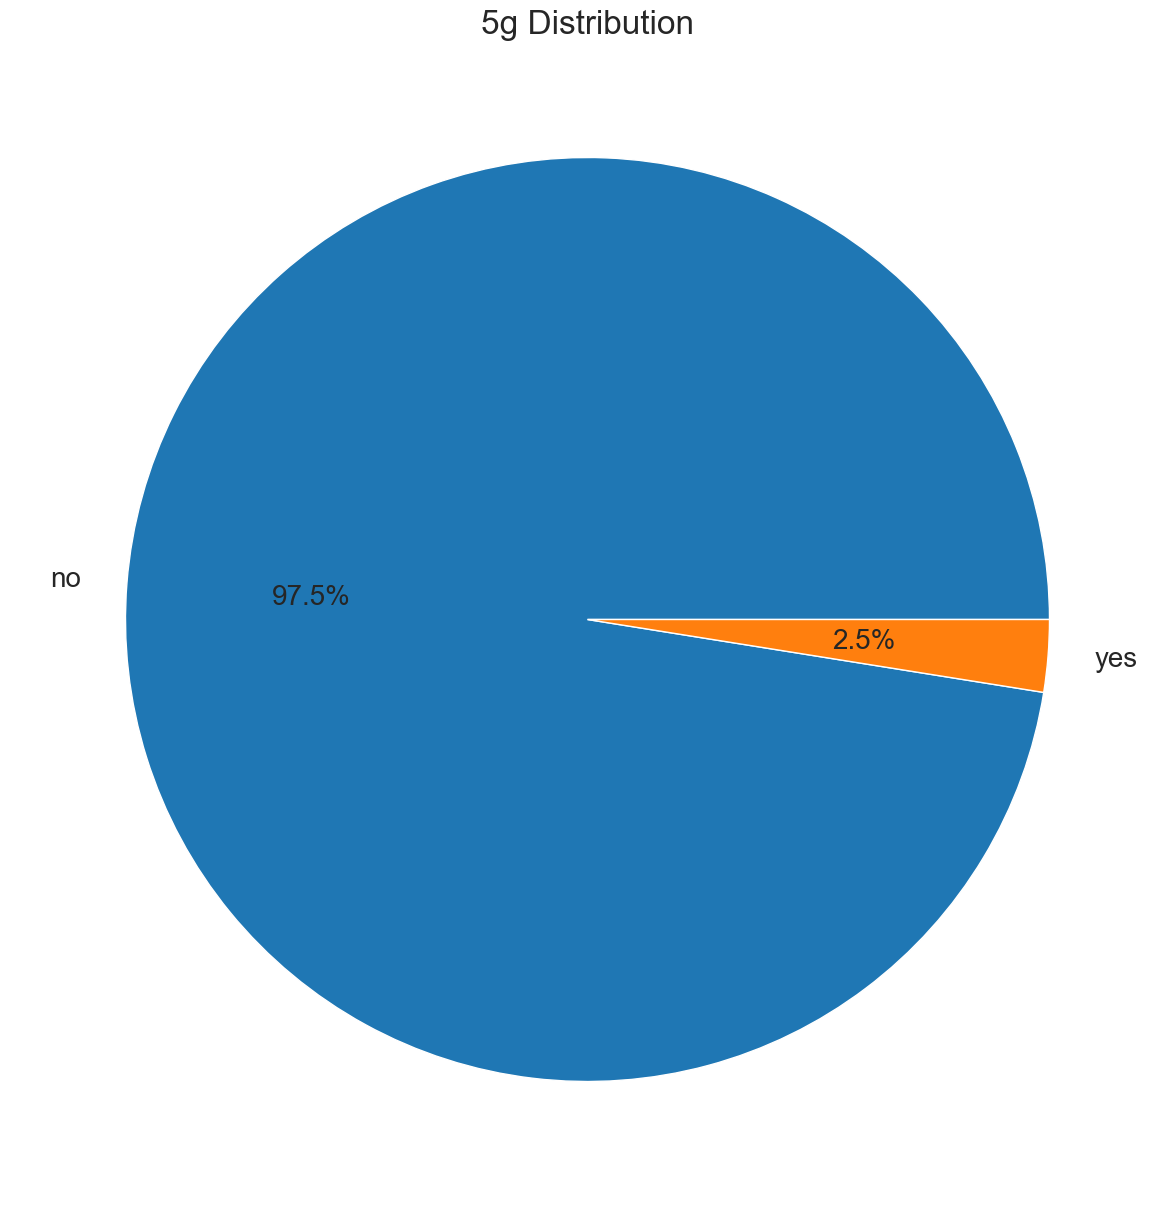

In [57]:
plt.figure(figsize=(8, 8))
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 10
object_features = ['device_brand', 'os', '4g', '5g']
#biểu đồ cột device_brand
counts = df2['device_brand'].value_counts()
counts.plot(kind='barh')
plt.title('Device Brand')
plt.xlabel('Count')
plt.ylabel('Device Brand')
for i, count in enumerate(counts):
    plt.text(count, i, str(count), ha='left', va='center')
plt.show()
#biểu đồ tròn của 'os', '4g', '5g'
plt.show()
for i in object_features[1:]:
    plt.rcParams["font.size"] = 20
    df2[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('{} Distribution'.format(i.capitalize()))
    plt.ylabel('')
    plt.show()

### Trực quan hóa biến số liệu

tứ phân vị

In [58]:
object_features = ['device_brand', 'os', '4g', '5g']
df3 = df2.drop(object_features, axis=1)
df3

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...
3447,15.27,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [59]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3250.0,13.611351,3.848012,5.080000,12.700000,12.830000,15.320000,30.710000
rear_camera_mp,3250.0,9.474948,4.804145,0.080000,5.000000,8.000000,13.000000,48.000000
front_camera_mp,3250.0,6.083415,6.593530,0.000000,2.000000,5.000000,8.000000,32.000000
internal_memory,3250.0,51.674108,84.330528,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3250.0,3.958003,1.214194,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3250.0,3073.750000,1296.961103,500.000000,2100.000000,3000.000000,3950.000000,9720.000000
weight,3250.0,182.403323,90.348620,69.000000,140.450000,158.000000,181.375000,855.000000
release_year,3250.0,2015.762769,2.185467,2013.000000,2014.000000,2015.000000,2018.000000,2020.000000
days_used,3250.0,696.074462,235.190458,91.000000,564.000000,706.000000,879.000000,1094.000000
normalized_used_price,3250.0,4.340524,0.576362,1.536867,4.018992,4.377328,4.724973,6.158969


In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 0 to 3453
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3250 non-null   float64
 1   rear_camera_mp         3250 non-null   float64
 2   front_camera_mp        3250 non-null   float64
 3   internal_memory        3250 non-null   float64
 4   ram                    3250 non-null   float64
 5   battery                3250 non-null   float64
 6   weight                 3250 non-null   float64
 7   release_year           3250 non-null   int64  
 8   days_used              3250 non-null   int64  
 9   normalized_used_price  3250 non-null   float64
 10  normalized_new_price   3250 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 304.7 KB


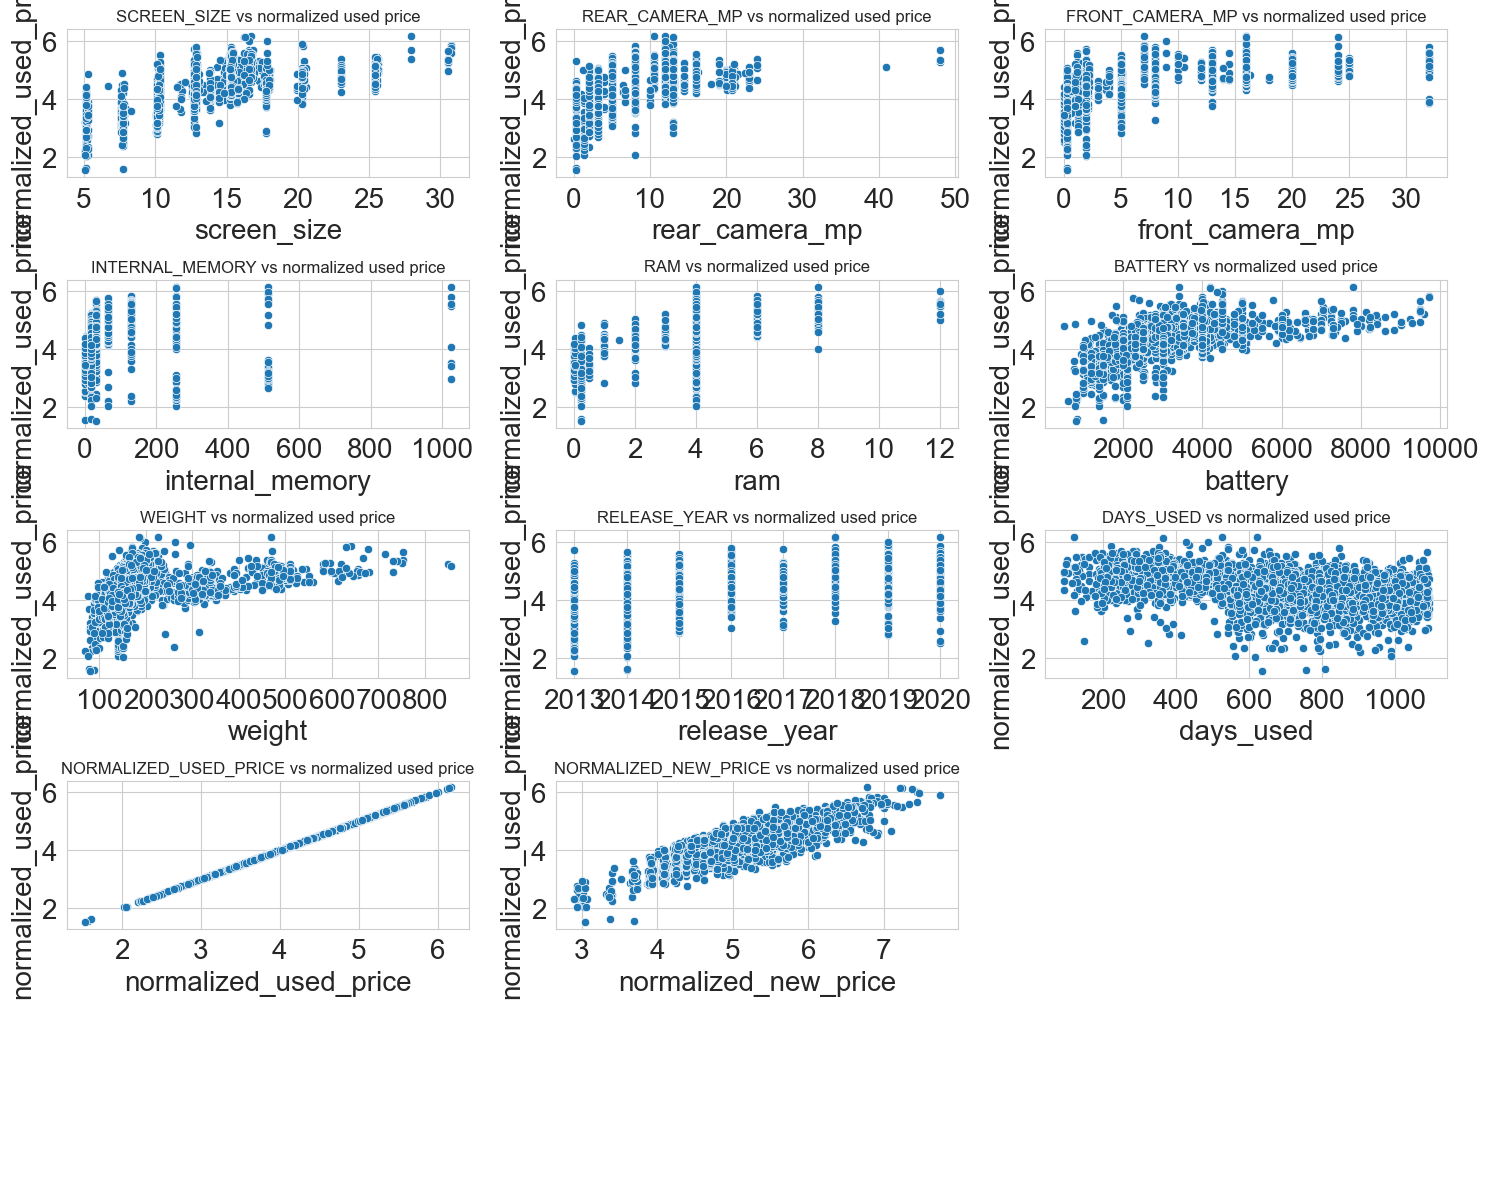

In [61]:
fig, axes = plt.subplots(5, 3, figsize=(15, 12))
plt.rcParams["font.size"] = 10
for i, ax in enumerate(axes.flatten()):
    if i < len(num_features):
        sns.scatterplot(x=df3[num_features[i]], y=df3['normalized_used_price'], ax=ax)
        ax.set_title('{} vs normalized used price'.format(num_features[i].upper()))
    else:
        ax.set_axis_off()

plt.tight_layout()
plt.show()

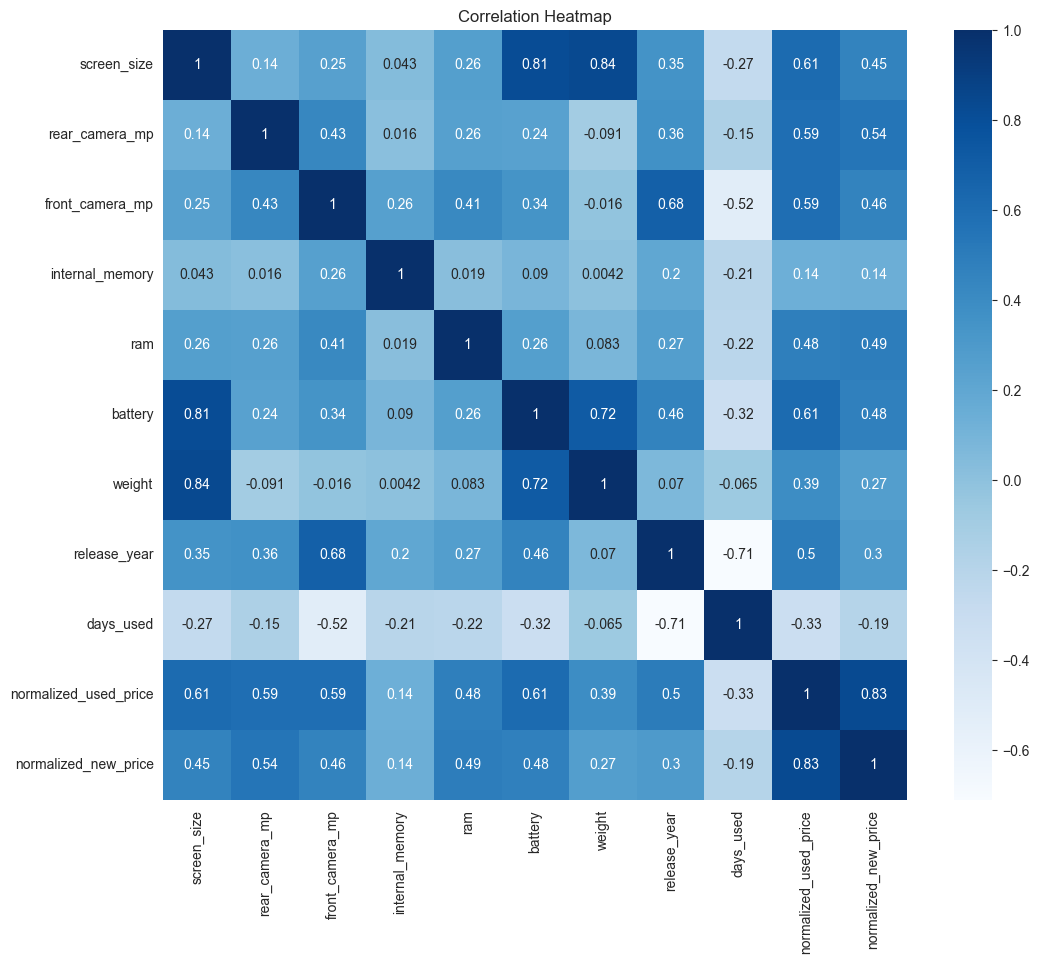

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(df3.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [63]:
corr_df3 = df3.corr()
corr_df3

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.143553,0.247230,0.042963,0.258867,0.813379,0.835093,0.348562,-0.267823,0.606838,0.454546
rear_camera_mp,0.143553,1.000000,0.428481,0.016249,0.257568,0.244606,-0.091284,0.360284,-0.148639,0.586742,0.540317
front_camera_mp,0.247230,0.428481,1.000000,0.256949,0.413148,0.339157,-0.016469,0.681073,-0.519115,0.588425,0.456980
internal_memory,0.042963,0.016249,0.256949,1.000000,0.019022,0.090063,0.004198,0.199912,-0.208389,0.137173,0.141450
ram,0.258867,0.257568,0.413148,0.019022,1.000000,0.260294,0.083331,0.267048,-0.222002,0.481442,0.492208
battery,0.813379,0.244606,0.339157,0.090063,0.260294,1.000000,0.716475,0.455417,-0.324868,0.609900,0.475641
weight,0.835093,-0.091284,-0.016469,0.004198,0.083331,0.716475,1.000000,0.070357,-0.064559,0.386641,0.269747
release_year,0.348562,0.360284,0.681073,0.199912,0.267048,0.455417,0.070357,1.000000,-0.710801,0.500307,0.295049
days_used,-0.267823,-0.148639,-0.519115,-0.208389,-0.222002,-0.324868,-0.064559,-0.710801,1.000000,-0.325963,-0.192113
normalized_used_price,0.606838,0.586742,0.588425,0.137173,0.481442,0.609900,0.386641,0.500307,-0.325963,1.000000,0.829799


**Insights dựa trên EDA**

Dữ liệu tốt nhất mô tả normalized_used_price là normalized_new_price. Các tính năng khác có mối quan hệ tỷ lệ thuận với normalized_used_price là screen_size, battery, front_camera_mp, rear_camera_mp, ram, release_year.

#Chọn biến cho mô hình

In [64]:
df_model = df2.copy()
df_model

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [65]:
for column_name in df_model.columns:
    if df_model[column_name].dtype == object:
        df_model[column_name] = LabelEncoder().fit_transform(df_model[column_name])
df_model

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,2,3,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,3,0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,1,0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,1,0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [66]:
x = df_model.drop("normalized_used_price", axis=1)
y = df_model["normalized_used_price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

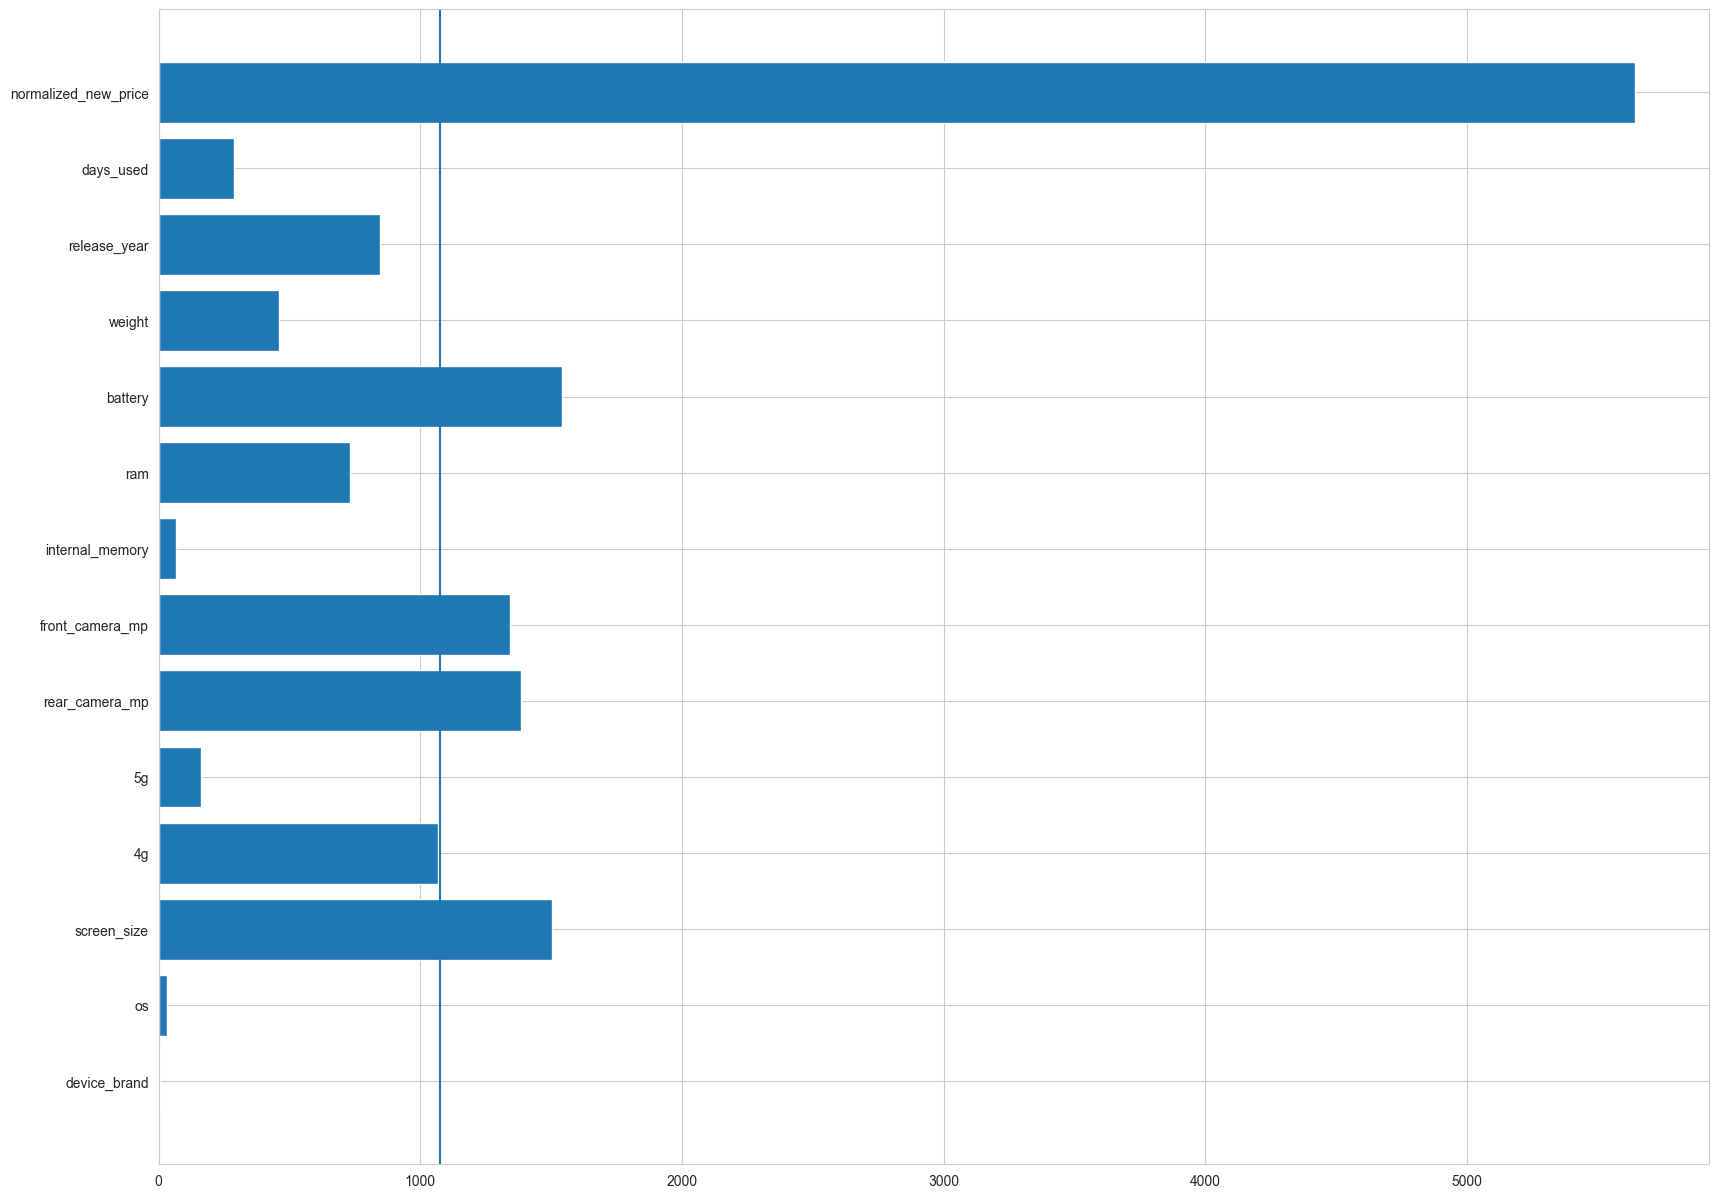

In [67]:
fs = SelectKBest(f_regression, k="all")
fs.fit(x_train, y_train)
threshold = np.mean(fs.scores_)
plt.rcParams['figure.figsize'] = (20, 15)

plt.barh([n for n in x.columns], fs.scores_)
plt.axvline(threshold)
plt.show()

Chọn biến cho mô hình đơn biến

In [68]:
features_score = {}
for i in range(len(fs.scores_)):
    features_score[x.columns[i]] = fs.scores_[i]

tg, selected = sorted(list(features_score.values()), reverse=True), []

k_simple_model = 1

for key, value in features_score.items():
    if value == tg[0]:
        selected.append(key)
        break

x_train_simple_model = x_train[selected]
x_test_simple_model = x_test[selected]

selected_column_simple_model = selected[0]
print("Cột được chọn cho mô hình hồi quy tuyến tính đơn biến là:", selected_column_simple_model)

Cột được chọn cho mô hình hồi quy tuyến tính đơn biến là: normalized_new_price


Chọn biến cho mô hình đa biến

In [69]:
features_score_multiple_model = {}
for i in range(len(fs.scores_)):
    features_score_multiple_model[x.columns[i]] = fs.scores_[i]

tg_multiple_model, selected_multiple_model = sorted(list(features_score_multiple_model.values()), reverse=True), []

k_multiple_model = len(fs.scores_)
for i in range(k_multiple_model):
    for key, value in features_score_multiple_model.items():
        if value == tg_multiple_model[i] and value > threshold:
            selected_multiple_model.append(key)
            break

x_train_multiple_model = x_train[selected_multiple_model]
x_test_multiple_model = x_test[selected_multiple_model]

selected_columns_multiple_model = selected_multiple_model[:]
print("Các cột được chọn cho mô hình hồi quy tuyến tính đa biến là:", selected_columns_multiple_model)

Các cột được chọn cho mô hình hồi quy tuyến tính đa biến là: ['normalized_new_price', 'battery', 'screen_size', 'rear_camera_mp', 'front_camera_mp']


In [70]:
print("x_train_simple_model:", x_train_simple_model.shape)
print("x_test_simple_model:", x_test_simple_model.shape)
print("x_train_multiple_model:", x_train_multiple_model.shape)
print("x_test_multiple_model:", x_test_multiple_model.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


x_train_simple_model: (2600, 1)
x_test_simple_model: (650, 1)
x_train_multiple_model: (2600, 5)
x_test_multiple_model: (650, 5)
y_train: (2600,)
y_test: (650,)


## Kiểm tra lại các biến phụ thuộc:
- Không có đa cộng tuyến
- Giá trị trung bình của số dư phải bằng 0
- Không có sự thay đổi phương sai
- Tính quy phạm của các thuật ngữ lỗi

In [71]:
def checking_vif(X):
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif
checking_vif(x_train_multiple_model)

,feature,VIF
0,normalized_new_price,26.177791
1,battery,20.216329
2,screen_size,41.627961
3,rear_camera_mp,7.226303
4,front_camera_mp,2.425874


Không có VIF của cột nào lớn hơn 5.

=> không xảy ra hiện tượng đa cổng tuyến

=> các biến độc lập trong mô hình không có mức độ tương quan cao và không gây ra vấn đề về đa cổng tuyến.

# Mô hình hồi quy tuyến tính

In [72]:
def linear_regr_model(X):
    model = sm.OLS(y_train, X)
    return model.fit()

Mô hình hồi quy tuyến tính đơn biến




In [73]:
x_train_simple_model = sm.add_constant(x_train_simple_model)
x_test_simple_model = sm.add_constant(x_test_simple_model)
result_simple_model = linear_regr_model(x_train_simple_model)
print(result_simple_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.685
Model:                               OLS   Adj. R-squared:                  0.685
Method:                    Least Squares   F-statistic:                     5641.
Date:                   Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                           23:12:53   Log-Likelihood:                -720.34
No. Observations:                   2600   AIC:                             1445.
Df Residuals:                       2598   BIC:                             1456.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [74]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

In [75]:
y_pred_simple_model = result_simple_model.predict(x_test_simple_model)
# Đánh giá mô hình đơn biến
rmse_simple_model, mae_simple_model, r2_simple_model = evaluate_model(y_test, y_pred_simple_model)
# In kết quả đánh giá mô hình đơn giản
print("Đánh giá mô hình hồi quy tuyến tính đơn biến trên tập dữ liệu kiểm tra:")
print("RMSE:", rmse_simple_model)
print("MAE:", mae_simple_model)
print("R-squared:", r2_simple_model)

Đánh giá mô hình hồi quy tuyến tính đơn biến trên tập dữ liệu kiểm tra:
RMSE: 0.33105620530899205
MAE: 0.2715931101653104
R-squared: 0.7019444743997663


In [76]:
x_train_multiple_model = sm.add_constant(x_train_multiple_model)
x_test_multiple_model = sm.add_constant(x_test_multiple_model)
result_multiple_model = linear_regr_model(x_train_multiple_model)
print(result_multiple_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.825
Model:                               OLS   Adj. R-squared:                  0.824
Method:                    Least Squares   F-statistic:                     2442.
Date:                   Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                           23:12:53   Log-Likelihood:                 43.575
No. Observations:                   2600   AIC:                            -75.15
Df Residuals:                       2594   BIC:                            -39.97
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [77]:
y_pred_multiple_model = result_multiple_model.predict(x_test_multiple_model)
# Đánh giá mô hình đa biến
rmse_multiple_model, mae_multiple_model, r2_multiple_model = evaluate_model(y_test, y_pred_multiple_model)
# In kết quả đánh giá mô hình đa biến
print("Đánh giá mô hình hồi quy tuyến tính đa biến trên tập dữ liệu kiểm tra:")
print("RMSE:", rmse_multiple_model)
print("MAE:", mae_multiple_model)
print("R-squared:", r2_multiple_model)

Đánh giá mô hình hồi quy tuyến tính đa biến trên tập dữ liệu kiểm tra:
RMSE: 0.24493631916659886
MAE: 0.19762427170521055
R-squared: 0.8368451131657207


In [78]:
residuals = result_multiple_model.resid
np.mean(residuals)

2.1439069323255702e-12

Giá trị 2.1439069323255702e-12 cho thấy rằng trung bình của các sai số là rất gần 0, tức là trung bình của các dự đoán của mô hình gần bằng giá trị thực tế.

=> Mô hình có khả năng dự đoán tốt và không có xu hướng chênh lệch đáng kể giữa giá trị dự đoán và giá trị thực tế.

<Axes: ylabel='Density'>

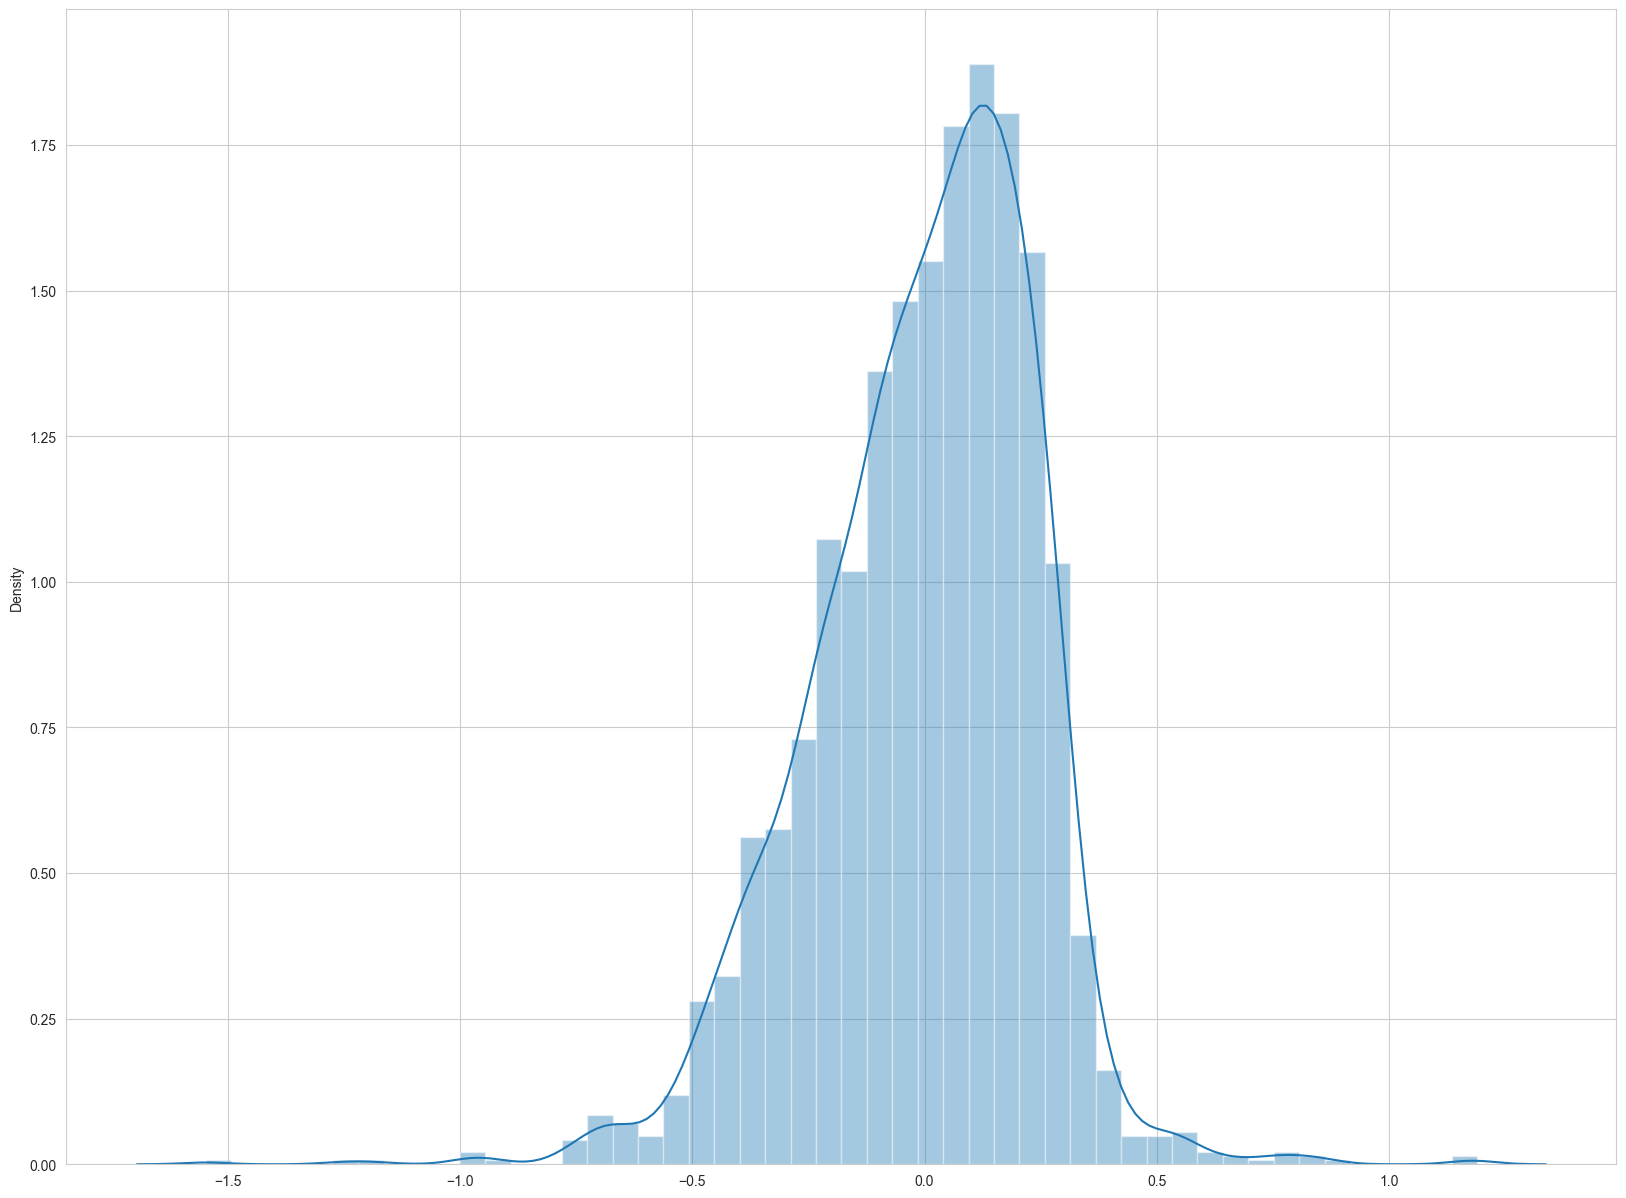

In [79]:
sns.distplot(residuals)

Các sai số được phân phối gần với phân phối chuẩn.

=> Mô hình tuân theo giả định về phân phối chuẩn của sai số.


##Dự đoán giá của thiết bị đã qua sử dụng dựa trên mô hình hồi quy tuyến tính đa biến

Các cột được chọn cho mô hình hồi quy tuyến tính đa biến là: ['normalized_new_price', 'battery', 'screen_size', 'rear_camera_mp', 'front_camera_mp']

In [80]:
# Truy cập thông số của mô hình
a = result_multiple_model.params[0]  # Intercept
b, c, d, e, f = result_multiple_model.params[1:]  # Coefficients for variables

print('Intercept (a):', a)
print('Coefficient for normalized_new_price (b):', b)
print('Coefficient for battery (c):', c)
print('Coefficient for screen_size (d):', d)
print('Coefficient for rear_camera_mp (e):', e)
print('Coefficient for front_camera_mp (f):', f)

Intercept (a): 1.186799306480654
Coefficient for normalized_new_price (b): 0.42973852418696235
Coefficient for battery (c): 2.168803157448808e-05
Coefficient for screen_size (d): 0.039507872996031895
Coefficient for rear_camera_mp (e): 0.021685944276217367
Coefficient for front_camera_mp (f): 0.017037004179576272


In [81]:
normalized_new_price = 10
battery = 3000
screen_size = 10
rear_camera_mp = 8
front_camera_mp = 5

# Thực hiện dự đoán
predicted_price = a + b * normalized_new_price + c * battery + d * screen_size + e * rear_camera_mp + f * front_camera_mp

print("Dự đoán giá điện thoại cũ:", predicted_price)

Dự đoán giá điện thoại cũ: 6.202999948141681
